(1) Carga de datos - Dataset de entrenamiento a dataframe

In [1]:
import pandas as pd



csv_bikeshare_train_fe = "../datasets/train_set_fe.csv"
df_bikeshare_train_fe = pd.read_csv(csv_bikeshare_train_fe)

C:\Users\gerar\AppData\Local\Temp\ipykernel_20820\2877211572.py:6: DtypeWarning: Columns (8) have mixed types. Specify dtype option on import or set low_memory=False.
  df_bikeshare_train_fe = pd.read_csv(csv_bikeshare_train_fe)


(2) EDA - Analizar las propiedades básicas del dataset

In [2]:
df_bikeshare_train_fe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 675561 entries, 0 to 675560
Data columns (total 21 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   trip_id              675561 non-null  int64  
 1   duration             675561 non-null  int64  
 2   start_time           675561 non-null  object 
 3   end_time             675561 non-null  object 
 4   start_lat            675561 non-null  float64
 5   start_lon            675561 non-null  float64
 6   end_lat              675561 non-null  float64
 7   end_lon              675561 non-null  float64
 8   bike_id              675561 non-null  object 
 9   plan_duration        675561 non-null  int64  
 10  trip_route_category  675561 non-null  object 
 11  passholder_type      675561 non-null  object 
 12  start_station        675561 non-null  int64  
 13  end_station          675561 non-null  int64  
 14  distance_km          675561 non-null  float64
 15  start_hour       

In [3]:
df_bikeshare_train_fe.describe()

,trip_id,duration,start_lat,start_lon,end_lat,end_lon,plan_duration,start_station,end_station,distance_km,start_hour,start_weekday,start_month,start_year,start_season,start_day_type
count,6.755610e+05,675561.000000,675561.000000,675561.000000,675561.000000,675561.000000,675561.000000,675561.000000,675561.000000,675561.000000,675561.000000,675561.000000,675561.000000,675561.000000,675561.000000,675561.000000
mean,1.063429e+08,31.096446,34.044957,-118.253713,34.043957,-118.260345,44.823416,3487.002564,3486.666991,2.646408,14.136901,3.011598,6.758259,2018.731024,2.482097,0.281379
std,4.513873e+07,92.758927,0.320044,2.295462,0.290416,2.061921,92.204557,611.550042,611.238837,118.530430,4.653235,1.979175,3.352157,1.404649,1.069148,0.449673
min,8.369648e+06,1.000000,33.710979,-118.495422,33.710979,-118.495422,0.000000,3000.000000,3000.000000,0.000000,0.000000,0.000000,1.000000,2016.000000,1.000000,0.000000
25%,7.405563e+07,7.000000,34.038609,-118.280182,34.037460,-118.280510,1.000000,3030.000000,3031.000000,0.452735,11.000000,1.000000,4.000000,2018.000000,2.000000,0.000000
50%,1.167950e+08,13.000000,34.046612,-118.256668,34.046520,-118.256980,30.000000,3064.000000,3064.000000,0.941241,15.000000,3.000000,7.000000,2019.000000,2.000000,0.000000
75%,1.397130e+08,25.000000,34.051941,-118.246422,34.050911,-118.246422,30.000000,4211.000000,4212.000000,1.632361,18.000000,5.000000,10.000000,2020.000000,3.000000,1.000000
max,1.794576e+08,1440.000000,55.705528,118.238258,55.705528,37.606541,999.000000,4594.000000,4594.000000,10426.960898,23.000000,6.000000,12.000000,2021.000000,4.000000,1.000000


(2) EDA - Analizar el balanceo de clases

In [4]:
df_bikeshare_train_fe_ratio = df_bikeshare_train_fe["passholder_type"].value_counts()
print(df_bikeshare_train_fe_ratio)

passholder_type
Monthly Pass    387407
Walk-up         203850
One Day Pass     39875
Annual Pass      32966
Flex Pass        11420
Testing             43
Name: count, dtype: int64


In [5]:
df_bikeshare_train_fe_rationorm = df_bikeshare_train_fe["passholder_type"].value_counts(normalize=True)
print(df_bikeshare_train_fe_rationorm)

passholder_type
Monthly Pass    0.573460
Walk-up         0.301749
One Day Pass    0.059025
Annual Pass     0.048798
Flex Pass       0.016904
Testing         0.000064
Name: proportion, dtype: float64


C:\Users\gerar\AppData\Local\Temp\ipykernel_20820\3152424660.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(


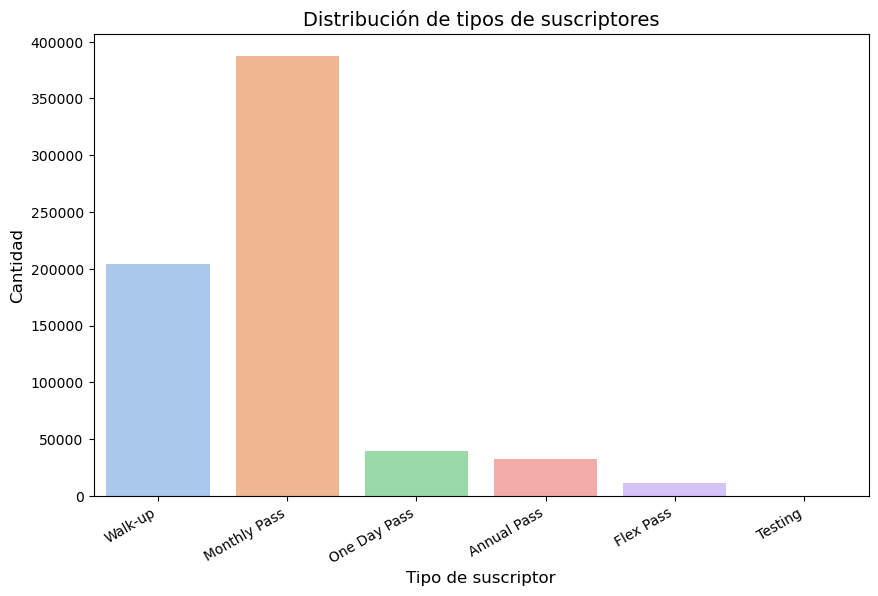

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns



# Configurar el tamaño de la figura
plt.figure(figsize=(10, 6))

# Usar una paleta de colores diferente
sns.countplot(
    x="passholder_type",
    data=df_bikeshare_train_fe,
    palette="pastel"
)

# Agregar etiquetas y título
plt.xlabel("Tipo de suscriptor", fontsize=12)
plt.ylabel("Cantidad", fontsize=12)
plt.title("Distribución de tipos de suscriptores", fontsize=14)

# Rotar etiquetas del eje X si es necesario
plt.xticks(rotation=30, ha="right")

# Mostrar la gráfica
plt.show()